In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [2]:
def plot_acc_vs_num_features(grid_scores, method_used):
    plt.figure(figsize=(16, 9))
    plt.title(method_used, fontsize=18, fontweight='bold', pad=20)

    plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
    plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)

    plt.plot(
        range(1, len(grid_scores) + 1), 
        grid_scores, 
        color='#303F9F', 
        linewidth=3,
    )

    plt.show()
    
def get_important_features(features_dataframe, rfecv, verbose=True):
    least_important_features = np.where(rfecv.support_ == False)[0]

    if verbose:
        print('not-important features:', list(features_dataframe.columns[least_important_features]))

    important_features_dataframe = features_dataframe.drop(
        features_dataframe.columns[least_important_features], 
        axis=1
    )

    if verbose:
        print('important features:', list(important_features_dataframe.columns))

    return important_features_dataframe

def plot_feature_importance_chart(important_features_dataframe, rfecv):
    plot_dataframe = pd.DataFrame()

    plot_dataframe['attr'] = important_features_dataframe.columns
    plot_dataframe['importance'] = rfecv.estimator_.feature_importances_

    plot_dataframe = plot_dataframe.sort_values(by='importance', ascending=False)

    plt.figure(figsize=(16, 14))
    plt.barh(
        y=plot_dataframe['attr'], 
        width=plot_dataframe['importance'], 
        color='#1976D2',
    )

    plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
    plt.xlabel('Importance', fontsize=14, labelpad=20)

    plt.show()

In [3]:
predict = pd.read_csv('dataset_8.csv')

In [4]:
predict.head()

,neighbourhood_1,neighbourhood_2,neighbourhood_3,neighbourhood_4,neighbourhood_5,neighbourhood_6,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_label,Central Region,East Region,North Region,North-East Region,last_day_review,price
0,0,0,0,1,0,1,1.28875,103.80814,15,18,0.23,32,331,1,1,0,0,0,128,44
1,0,0,0,0,1,0,1.33171,103.79383,4,11,0.13,1,362,2,1,0,0,0,597,276
2,0,0,1,0,1,1,1.30901,103.79639,1,0,0.00,1,0,0,1,0,0,0,2137,208
3,0,0,1,0,1,1,1.28342,103.78585,3,0,0.00,1,365,1,1,0,0,0,2137,128
4,0,0,0,1,0,0,1.31313,103.91479,1,0,0.00,1,365,1,0,1,0,0,2137,278


In [6]:
X = predict.drop('price', axis=1)
y = predict['price'].astype('float64')

=====================GRID SCORES=====================
[-0.39273234  0.08387331  0.36066164  0.48080203  0.51083917  0.52342617
  0.52841724  0.51777519  0.52163677  0.52217177  0.52865656  0.52588958
  0.52646409  0.5300415   0.52445556  0.52696459  0.52822226  0.53461566
  0.52483436]
=====================FEATURE RANKING=====================
feature: neighbourhood_1 rank: 1
feature: neighbourhood_2 rank: 1
feature: neighbourhood_3 rank: 1
feature: neighbourhood_4 rank: 1
feature: neighbourhood_5 rank: 1
feature: neighbourhood_6 rank: 1
feature: latitude rank: 1
feature: longitude rank: 1
feature: minimum_nights rank: 1
feature: number_of_reviews rank: 1
feature: reviews_per_month rank: 1
feature: calculated_host_listings_count rank: 1
feature: availability_365 rank: 1
feature: room_type_label rank: 1
feature: Central Region rank: 1
feature: East Region rank: 1
feature: North Region rank: 2
feature: North-East Region rank: 1
feature: last_day_review rank: 1
===================== MOST I

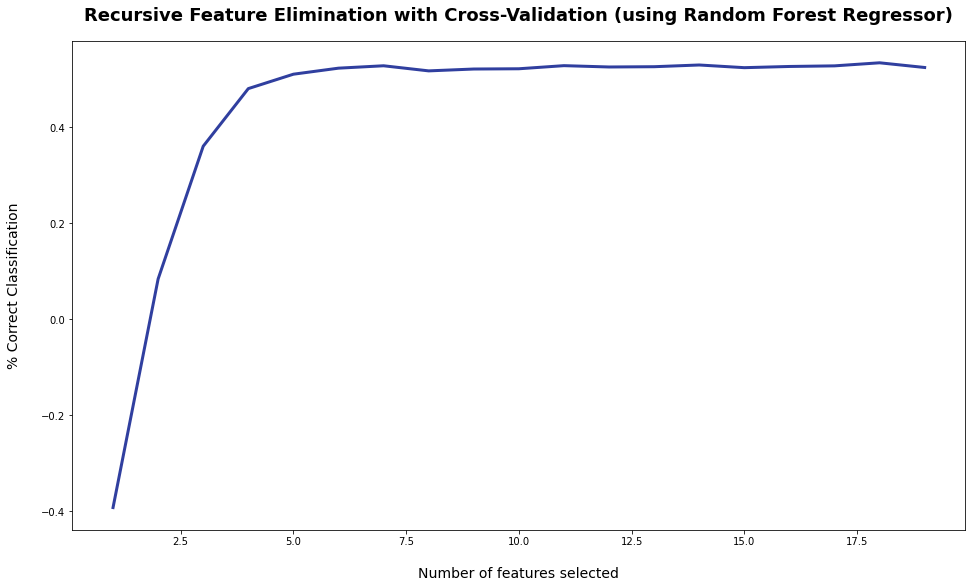

In [7]:
rfecv = RFECV(estimator=RandomForestRegressor(), cv=5)
rfecv = rfecv.fit(X,y)

print("=====================GRID SCORES=====================")
print(rfecv.grid_scores_)
print("=====================FEATURE RANKING=====================")
for column, rank in zip(X.columns, rfecv.ranking_):
    print(f'feature: {column} rank: {rank}')
print("===================== MOST IMPORTANT FEATURES=====================")
most_important_features = get_important_features(X, rfecv)

plot_acc_vs_num_features(
    rfecv.grid_scores_, 
    'Recursive Feature Elimination with Cross-Validation (using Random Forest Regressor)', 
)